# **<center>Topología Digital</center>**

## <center>*==Capitulo 1: Conceptos y propiedades básicas de una imagen digital==*</center>

### *Definición 1.1: Imagen Digital*

Una imagen digital es una función $ f: A \subset \mathbb{N}^n \rightarrow \mathbb{Z} $ con $ n = 1, 3 $ o $ 4 $, que asigna a cada elemento o píxel $(i, j) \in A$ un único elemento $f(i, j) \in \mathbb{Z}$ que representa el color asociado a dicho píxel.

### *Definición 1.2: Matriz imagen de una imagen digital*

Una imagen digital de $m \times n$ píxeles es almacenada en la computadora mediante una matriz $A_{m \times n}$. En este caso, el coeficiente $A_{ij}$ representa el color asociado al píxel ubicado en la fila $i$ y columna $j$ para $1 < i < m$, $1 < j < n$. Según el modo con que se confeccione la imagen, dicho coeficiente puede ser un número, una terna o una cuaterna ordenada de enteros comprendidos entre 0 y 255.

La matriz $A$ recibe el nombre de matriz imagen o matriz asociada a la imagen digital.



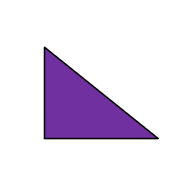

/tmp/ipykernel_8572/2425009624.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


,0,1,2,3,4,5,6,7,8,9
0,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
1,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
2,"(255, 255, 255)","(255, 255, 255)","(123, 123, 123)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
3,"(255, 255, 255)","(255, 255, 255)","(112, 48, 160)","(112, 48, 160)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
4,"(255, 255, 255)","(255, 255, 255)","(112, 48, 160)","(112, 48, 160)","(112, 48, 160)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
5,"(255, 255, 255)","(255, 255, 255)","(112, 48, 160)","(112, 48, 160)","(112, 48, 160)","(112, 48, 160)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
6,"(255, 255, 255)","(255, 255, 255)","(112, 48, 160)","(112, 48, 160)","(112, 48, 160)","(112, 48, 160)","(112, 48, 160)","(0, 0, 0)","(255, 255, 255)","(255, 255, 255)"
7,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
8,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"
9,"(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)","(255, 255, 255)"


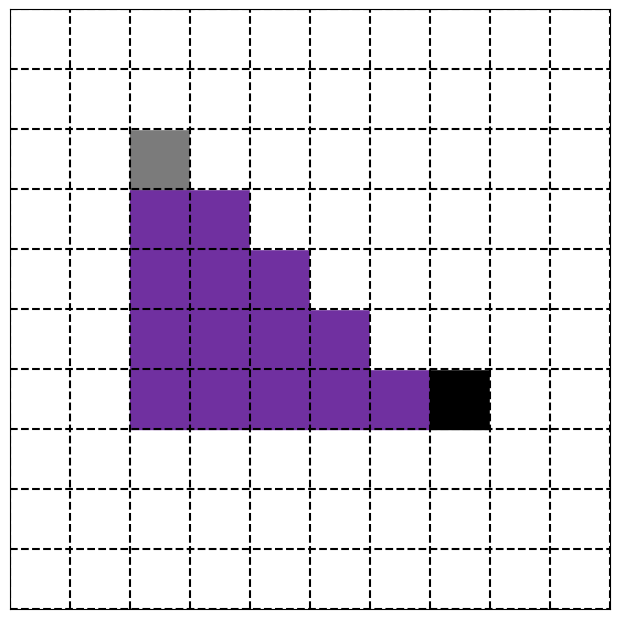

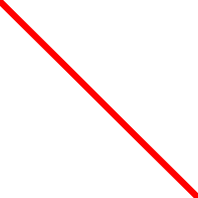

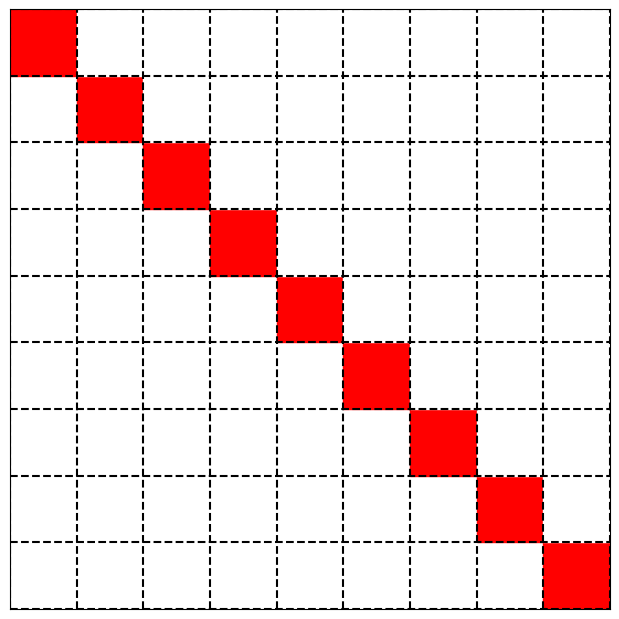

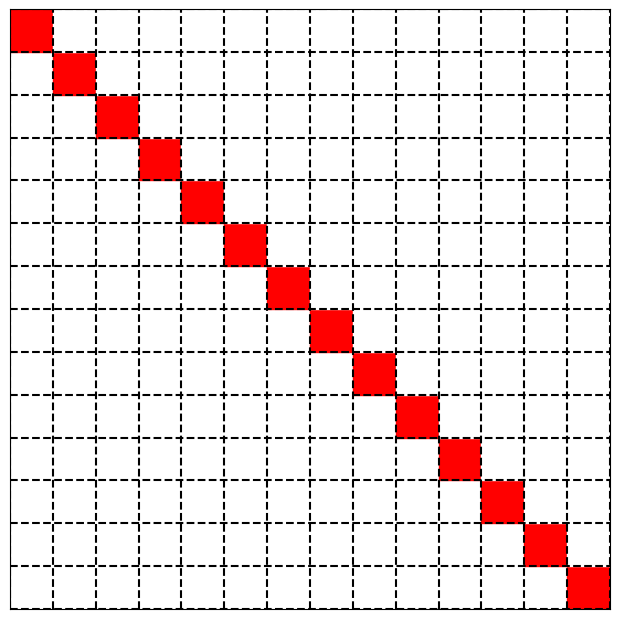

In [370]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def mostrar_matriz_img(matriz):
    matriz = np.rot90(np.transpose(matriz), k=1) 

    n, m = matriz.shape  # Obtener las dimensiones de la matriz

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus preferencias

    # Dibuja las líneas horizontales
    for i in range(n + 1):
        ax.axhline(y=i, color='black', linestyle='--')

    # Dibuja las líneas verticales
    for j in range(m + 1):
        ax.axvline(x=j, color='black', linestyle='--')

    # Configura los límites del gráfico para ocupar todo el espacio
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)

    # Oculta los números de los ejes
    ax.set_xticks([])
    ax.set_yticks([])

    # Pintar cada celda del retículo con el color correspondiente de la matriz
    for i in range(n):
        for j in range(m):
            elemento = matriz[i, j]
            if isinstance(elemento, tuple):
                # Matriz de tuplas RGB
                color_normalizado = (elemento[0] / 255, elemento[1] / 255, elemento[2] / 255)  # Normaliza el color
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_normalizado))
            elif isinstance(elemento, int):
                # Matriz de valores enteros (B/N o grises)
                color = (elemento / 255, elemento / 255, elemento / 255)  # Normaliza el color
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    # Mostrar el gráfico
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')  # Para que los cuadrados sean de igual tamaño
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Ajusta los márgenes a cero
    plt.show()

def matriz_a_img_DF(matriz):
    # Convierte la matriz en un DataFrame
    df = pd.DataFrame(matriz)

    # Función para aplicar el estilo con colores RGB, grises o blanco y negro y crear celdas HTML
    def estilo_color_html(valor):
        if isinstance(valor, tuple) and len(valor) == 3:
            # Convierte la tupla RGB en una cadena de formato CSS
            color = f'rgb{valor}'
            return f'background-color: {color}; width: 30px; height: 30px; text-align: center;'
        elif isinstance(valor, int):
            # Convierte el valor (RGB, blanco y negro o grises) en una cadena de formato CSS
            color = f'rgb({valor}, {valor}, {valor})'
            return f'background-color: {color}; width: 30px; height: 30px; text-align: center;'
        else:
            return ''

    # Aplicar el estilo al DataFrame
    styled_df = df.style.applymap(estilo_color_html)

    # Obtener el HTML con los estilos aplicados
    styled_html = styled_df.to_html(escape=False, index=False)

    # Mostrar el HTML en el cuaderno
    display(HTML(styled_html))
   
def matrizImagenDigital(imagen, resolucion, tipo='RGB'):
    # Obtener las dimensiones de la imagen "Real"
    anchoImg, altoImg = imagen.size
    #Obtener la resolucion en pixeles
    ancho_reso, alto_reso = resolucion

    newAnchoPx = anchoImg / ancho_reso
    newAltoPx = altoImg / alto_reso

    # Crear una matriz para almacenar los valores de píxeles en el centro de cada cuadrado
    matriz = np.zeros((ancho_reso, alto_reso), dtype="object")

    for x in range(0, ancho_reso):
        for y in range(0, alto_reso):
            coorx = int(anchoImg / (2 * ancho_reso) + x * newAnchoPx)
            coory = int(altoImg / (2 * alto_reso) + y * newAltoPx)
            pixelIMG = imagen.getpixel((coorx, coory))[:3]

            if tipo == 'Gray':
                # Calcular el valor de escala de grises promedio (media de los canales RGB)
                valor_pixel = int((pixelIMG[0] + pixelIMG[1] + pixelIMG[2]) / 3)
            elif tipo == 'B/N':
                # Convertir a blanco y negro (negro si el valor es menor o igual a 128, blanco si es mayor)
                valor_pixel = 0 if sum(pixelIMG) <= 384 else 255
            elif tipo == 'RGB':
                # Mantener el color original (RGB)
                valor_pixel = pixelIMG
            else:
                raise ValueError("Tipo no válido. Use 'Gray', 'B/N' o 'RGB'.")

            #matriz[resolucion - x -1, resolucion - y - 1] = valor_pixel
            matriz[x, y] = valor_pixel

    return np.transpose(matriz)

if __name__ == "__main__":
    # Ruta de la imagen PNG que deseas procesar (debe ser una imagen RGBA)
    imagen_ruta = 'triangle.png'
    #imagen_ruta = 'ship.png'
    #imagen_ruta = 'recta.png'

    # Resolución de pixeles de la cuadrícula (número de divisiones)
    ancho, alto = 10, 10
    resolucion = (ancho, alto)  # Cambia este valor según tus necesidades

    # Abrir la imagen
    imag_triangulo = Image.open(imagen_ruta)

    #imprimir imagen
    display(imag_triangulo)

    #figura 1.1 del articulo
    
    # Obtener la matriz de imagen digital
    # Se puede cambiar el tipo si se quiere blanco y negro ("B/N")
    # si quieres grises ("Gray")
    # si quieres RGB es por defecto "RGB"
    matriz = matrizImagenDigital(imag_triangulo, resolucion, 'RGB')
    matriz_a_img_DF(matriz)
    mostrar_matriz_img(matriz)


    #fig 1.2 del articulo
    for ii in [0,9,14]:
        img = Image.open('recta.png')
        reso = (ii,ii)
        if ii == 0:
            display(img)
        else:
            mostrar_matriz_img(matrizImagenDigital(img, reso))
            

    

In [371]:
#Ejemplo 1.5: Dada la siguiente imagen de 38 x 38 píxeles en Escala de Grises:
#a) Aplicar el Método de Umbralización para separar el objeto (porción de
#paralelepípedo rectangular) del fondo.
#b) Aplicar al objeto el Método de Umbralización a fin de separar el objeto de sus bordes.

if __name__ == "__main__":
    #llamar a la imagen
    img = Image.open('cubo.png')
    #resolucion de la imagen 
    resolucion = (38, 38)
    #matriz Img
    matriz_img = matrizImagenDigital(img, resolucion, 'Gray')
    matriz_a_img_DF(matriz_img)

/tmp/ipykernel_8572/2425009624.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(estilo_color_html)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,141,159,177,194,189,162,180,198,186,168,150,201,183,165,146,138,179,161,143,141,155,169,139,144,158,171,185,146,160,174,183,174,164,177,181,172,162,153
1,168,182,196,210,207,185,199,213,204,191,177,216,202,188,174,169,199,186,172,171,181,192,169,173,183,194,204,175,185,196,203,196,188,198,202,194,187,179
2,194,205,216,226,224,207,218,228,223,213,204,230,221,212,202,199,219,210,201,200,207,215,199,201,209,216,224,203,210,218,223,217,212,219,222,216,211,205
3,221,228,235,242,242,229,237,244,241,236,232,245,240,236,231,229,239,235,230,230,234,238,229,220,235,239,243,231,228,234,238,232,226,235,242,239,235,219
4,239,244,248,252,253,244,238,241,253,238,237,241,239,238,236,236,239,238,236,237,241,244,236,238,241,245,248,238,242,245,247,243,239,246,247,243,239,235
5,244,247,250,253,254,248,242,244,253,252,242,244,243,242,242,242,243,242,242,242,243,245,241,242,244,245,246,242,244,245,246,244,241,246,245,243,241,238
6,249,251,252,254,254,251,247,247,254,253,247,247,247,247,247,247,247,247,247,247,246,245,247,247,246,245,244,247,246,245,244,244,243,245,244,243,243,242
7,253,254,254,255,255,254,254,250,255,255,252,250,251,252,253,252,251,252,253,252,249,246,253,251,248,245,243,251,248,245,243,244,244,244,243,244,245,245
8,252,252,253,253,253,253,249,248,248,253,250,247,253,249,250,250,248,249,252,248,248,247,250,249,248,246,244,249,247,246,244,234,236,245,244,245,236,238
9,249,249,249,249,249,249,244,243,249,249,243,242,243,243,243,244,243,238,243,248,239,237,243,241,239,236,234,241,238,236,234,228,236,236,234,235,226,225


## <center>*====Capítulo 2: Nociones de topología Digital====*</center>

### *Definición 2.1: Topología Digital*
La Topología Digital es la disciplina de la Matemática creada para estudiar las
propiedades topológicas de una imagen digital.

### *Definición 2.2: El plano digital*
El conjunto $\mathbb{Z}^2$, también conocido como el plano digital 2D de números enteros, está formado por todos los pares ordenados de números enteros $(m, n)$, donde tanto $m$ como $n$ son enteros. Puedes representarlo en notación de conjunto de la siguiente manera:


$$
\mathbb{Z}^2 = \{(m, n) : m, n \in \mathbb{Z}\}
$$

Esto significa que $\mathbb{Z}^2$ incluye todos los puntos en un plano bidimensional donde las coordenadas $x$ ($m$) y $y$ ($n$) son enteros. Es decir, todos los puntos con coordenadas enteras en un plano cartesiano forman parte de $\mathbb{Z}^2$.

### *Notaciones básicas*

- La distancia euclidiana entre $P = (p_1, p_2)$ y $Q = (q_1, q_2) \in \mathbb{Z}$ es
$$
d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}
$$

- Si $P = (p_1, p_2) \in \mathbb{R}$ y $\epsilon > 0$, el disco de centro $P$ y radio $\epsilon$ es
$$
B(P, \epsilon) = \{X = (x, y) \in \mathbb{R} : d(P, X) < \epsilon\}
$$

- Si $A$ es un subconjunto de $\mathbb{R}^{2}$ entonces:

    $A^c$ = complemento de $A$

    $\text{Int}(A)$ = interior de $A$

    $\text{Fr}(A)$ = frontera de $A$



In [372]:
def distanciaEuclidiana(punto1, punto2):
    x1, y1 = punto1
    x2, y2 = punto2
    return np.sqrt((x1-x2)**2+(y1-y2)**2)

def bola(punto, radio = 1):
    bola = []
    x, y = punto
    for xx in range(x-5, x+5):
        for yy in range(y-5, y+5):
            punto_ = (xx,yy)
            if(distanciaEuclidiana(punto, punto_) < radio):
                bola.append(punto_)
    return bola

def complemento(subset, max=100, min = -100):
    setA = list(subset)
    x_range = range(min, max)
    y_range = range(min, max)
    universe = [(x, y) for x in x_range for y in y_range]
    complement = [x for x in universe if x not in setA]
    return set(complement)

if __name__ == "__main__":
    punto1 = (0,7)
    punto2 = (0,8)
    print("distancia del ", punto1, " al ", punto2 , " es ", distanciaEuclidiana(punto1, punto2))
    print("bola de ",punto1, " es ",bola(punto1,2))
    S = {(2,4),(2,3),(3,5),(3,4),(3,3),(3,2),(4,5),(4,4),(4,3),(4,2),(5,4),(5,3)}
    print("conjunto S=", S)
    print("Complemento de S:",complemento(S))
    

distancia del  (0, 7)  al  (0, 8)  es  1.0
bola de  (0, 7)  es  [(-1, 6), (-1, 7), (-1, 8), (0, 6), (0, 7), (0, 8), (1, 6), (1, 7), (1, 8)]
conjunto S= {(4, 4), (2, 4), (3, 4), (4, 3), (5, 4), (4, 2), (2, 3), (4, 5), (3, 3), (5, 3), (3, 2), (3, 5)}
Complemento de S: {(-75, -25), (30, -9), (16, 93), (90, 42), (-100, -82), (-59, -81), (92, 88), (-82, -65), (-96, 37), (-47, -71), (-6, -70), (44, 47), (85, 48), (-70, -55), (-84, 47), (29, -76), (-68, -9), (6, -60), (-29, -81), (97, 58), (-93, -66), (-52, -65), (8, -14), (-89, 53), (-17, -71), (24, -70), (84, -19), (-73, -3), (-40, -55), (-13, 48), (1, -54), (59, -76), (-98, -60), (-38, -9), (36, -60), (77, -59), (-61, 7), (-22, -65), (38, -14), (-45, -49), (-59, 53), (15, 2), (54, -70), (-82, 69), (-43, -3), (-10, -55), (17, 48), (31, -54), (91, -3), (-66, 13), (-6, 64), (-8, -9), (66, -60), (-91, -44), (-31, 7), (10, 8), (43, -44), (-87, 75), (-15, -49), (-29, 53), (45, 2), (-52, 69), (22, 18), (61, -54), (-36, 13), (24, 64), (98, 13), (1



### *Definición 2.3: Vecinos 4N y 8N de un punto*
Dado un punto $P = (x, y) \in \mathbb{Z}$, entonces:

a) Los vecinos 4N de P son $(x, y)$, $(x \pm 1, y)$ y $(x, y \pm 1)$.

b) Los vecinos 8N de P son $(x, y)$, $(x \pm 1, y)$, $(x, y \pm 1)$, $(x+1, y \pm 1)$ y $(x-1, y \pm 1)$.

c) Si $Q \in \mathbb{Z}^{2}$, diremos que **Q es adyacente 4N (u 8N) a P** si P es vecino 4N (u 8N) de Q.



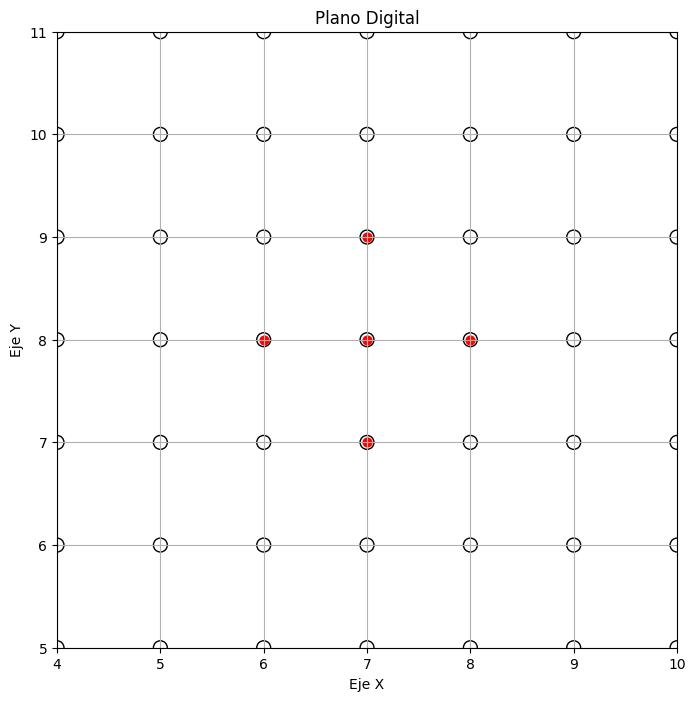

vecinos 4N de  (7, 8)  son  [(7, 8), (8, 8), (6, 8), (7, 9), (7, 7)]


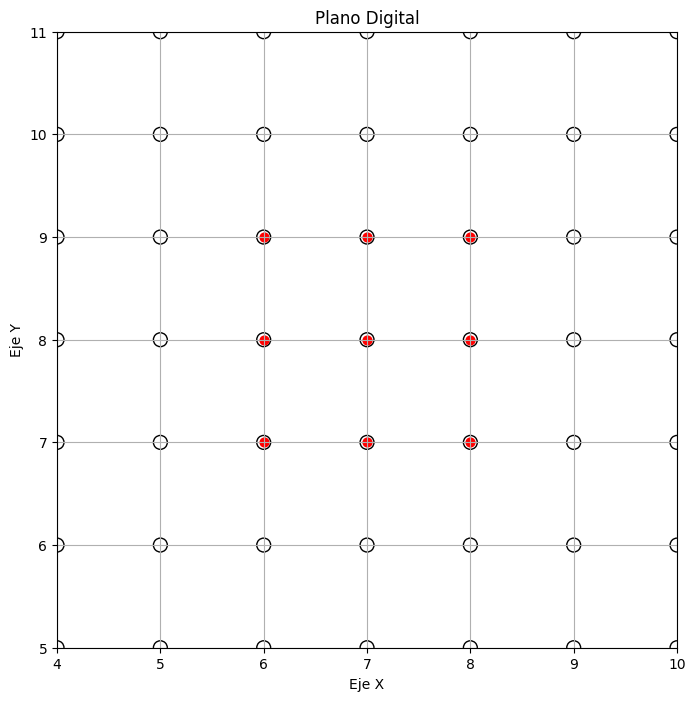

vecinos 8N de  (7, 8)  son  [(7, 8), (8, 8), (6, 8), (7, 9), (7, 7), (8, 9), (8, 7), (6, 9), (6, 7)]


In [373]:
#Recibe un subconjunto del plano
def graficarPlanoDigital(conjunto):
    # Convierte el conjunto en una lista de coordenadas de puntos enteros
    puntos = list(conjunto)

    # Verifica si el conjunto está vacío
    if not puntos:
        print("El conjunto está vacío.")
        return

    # Separa las coordenadas x y y en listas separadas
    x_values, y_values = zip(*puntos)

    # Calcula los valores mínimos y máximos de x e y en el conjunto
    min_x, max_x = min(x_values), max(x_values)
    min_y, max_y = min(y_values), max(y_values)

    # Ajusta el rango y el tamaño del gráfico en función de los valores mínimos y máximos
    x_range = range(min_x - 2, max_x + 3)
    y_range = range(min_y - 2, max_y + 3)

    # Crea una lista de coordenadas de todos los puntos posibles en el rango
    todos_los_puntos = [(x, y) for x in x_range for y in y_range]

    # Separa las coordenadas x e y de todos los puntos posibles
    x_todos, y_todos = zip(*todos_los_puntos)

    # Crea el gráfico
    plt.figure(figsize=(8, 8))  # Ajusta el tamaño del gráfico
    plt.scatter(x_todos, y_todos, marker='o', facecolor='none', edgecolor='black', s=100)
    plt.scatter(x_values, y_values, marker='o', color='r', s=40)
    plt.grid(True)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Plano Digital')
    plt.xlim(min_x - 2, max_x + 2)  # Ajusta los límites del gráfico
    plt.ylim(min_y - 2, max_y + 2)

    # Muestra el gráfico
    plt.show()


def vecindad(punto, tipo = "8N"):
    x, y = punto
    if(tipo == "4N"):
        return [(x,y), (x+1, y), (x-1,y), (x, y+1),(x, y-1)]
    if(tipo == "8N"):
        return [(x,y), (x+1, y), (x-1,y), (x, y+1), (x, y-1),
                (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)]
    
    
if __name__ == "__main__":
    #un punto arbitrario en plano digital
    punto = (7,8)
    
    #obtener conjunto de vecinos 4N 
    vecinos_punto_4N = vecindad(punto, "4N")
    graficarPlanoDigital(vecinos_punto_4N)
    print("vecinos 4N de ", punto , " son ", vecinos_punto_4N)

    #obtener conjunto de vecinos 8N
    vecinos_punto_8N = vecindad(punto, "8N")
    graficarPlanoDigital(vecinos_punto_8N)
    print("vecinos 8N de ", punto , " son ",vecinos_punto_8N)
    



### *Definición 2.4: Vecindad 4N y 8N de un punto*

Dado un punto $P = (x, y) \in \mathbb{Z}^{2}$ entonces:

a) La vecindad 4N de P es $\{Q \in \mathbb{Z}^{2} : d(P, Q) \leq 1\}$.

b) La vecindad 8N de P es $\{Q \in \mathbb{Z}^{2} : d(P, Q) \leq 2\}$.

**nota:** la definicion anterior esta son parecidas, pero en el anterior definen un vecino  aqui definen la vecindad, pero ya habiamos definido como era una vecindad de un punto. rambien nos podemos dar cuenta que la vecindad 4N esta dentro de la vecindad 8N.

### Definición 2.5: Base para una topología en ℤ²

Sea $P = (x, y) \in \mathbb{Z}^{2}$ y $U(P)$ el conjunto definido por:

$$
U(P) =
\begin{cases}
{P} & \text{si } x + y \text{ es impar} \\
\{Q : Q \text{ es vecino 4N de P}\} & \text{si } x + y \text{ es par}
\end{cases}
$$

El conjunto $B = \{U(P) : P \in \mathbb{Z}^{2}\}$ recibe el nombre de **Base para una topología** en $\mathbb{Z}^2$.

**nota:** Ahora estamos en condiciones de presentar **la Topología de Marcus-Wyse** para $\mathbb{Z}^{2}$. La llamaremos **"la topología digital** de $\mathbb{Z}^{2}$" y se define de la siguiente manera:



In [374]:
#definicion de u
def U(punto):
    x, y = punto 
    if((x+y)%2 != 0):
        return {punto}
    else:
        return set(vecindad(punto, "4N"))

base_topología_digital = []
# creando basicos
for x in range(-100,100):
    for y in range(-100, 100):
        punto = (x,y)
        base_topología_digital.append(U(punto))

#imprime lo basicos de la base
print(base_topología_digital)

[{(-100, -100), (-100, -101), (-101, -100), (-99, -100), (-100, -99)}, {(-100, -99)}, {(-101, -98), (-99, -98), (-100, -97), (-100, -98), (-100, -99)}, {(-100, -97)}, {(-100, -96), (-101, -96), (-100, -97), (-99, -96), (-100, -95)}, {(-100, -95)}, {(-100, -93), (-100, -94), (-101, -94), (-100, -95), (-99, -94)}, {(-100, -93)}, {(-101, -92), (-100, -93), (-99, -92), (-100, -91), (-100, -92)}, {(-100, -91)}, {(-100, -90), (-101, -90), (-100, -91), (-99, -90), (-100, -89)}, {(-100, -89)}, {(-100, -87), (-100, -88), (-100, -89), (-99, -88), (-101, -88)}, {(-100, -87)}, {(-100, -87), (-101, -86), (-99, -86), (-100, -85), (-100, -86)}, {(-100, -85)}, {(-100, -83), (-100, -84), (-101, -84), (-100, -85), (-99, -84)}, {(-100, -83)}, {(-101, -82), (-100, -83), (-99, -82), (-100, -81), (-100, -82)}, {(-100, -81)}, {(-101, -80), (-100, -81), (-99, -80), (-100, -79), (-100, -80)}, {(-100, -79)}, {(-100, -77), (-100, -78), (-101, -78), (-100, -79), (-99, -78)}, {(-100, -77)}, {(-100, -77), (-99, -76

Supongamos que tenemos un conjunto cualquiera de puntos de la topologia, queremos saber si es abierto:

El conjunto  {(0, 1), (2, 3), (1, 2), (2, 1), (1, 0), (1, 1)}


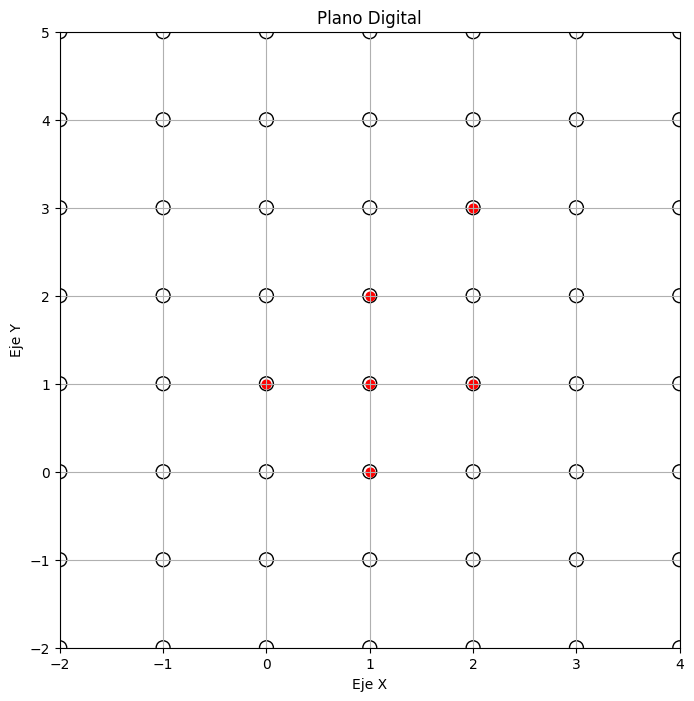

El conjunto  {(5, 2), (3, 2), (4, 1), (4, 3)}
El conjunto es abierto : True


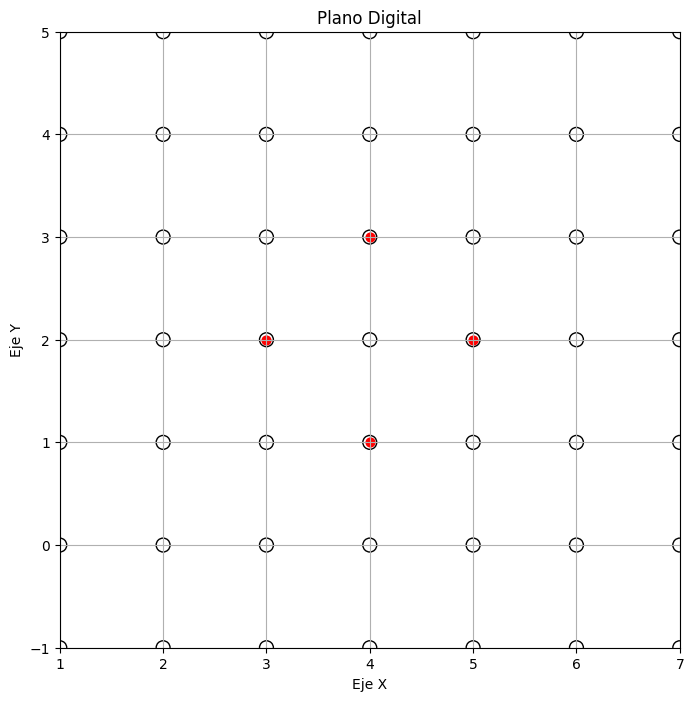

In [375]:
def interior(conjunto):

    subset = set(conjunto)
    abiertos_subset = []

    for element in subset:
        for basic in base_topología_digital:
            if element in basic:
                if basic <= subset:
                    abiertos_subset.append(basic)

    unionTotal = set()
    for basic in abiertos_subset:
        unionTotal = unionTotal | basic

    return unionTotal

#frontera como se definio en el articulo
def frontera(S):
    conjunto_S = set(S)
    frontera_S = set()

    for punto in conjunto_S:
        vecinos = vecindad(punto, "4N")  # Utiliza vecindad 4N
        if not all(vecino in conjunto_S for vecino in vecinos):
            frontera_S.add(punto)

    return frontera_S
    
def es_abierto(set):
    if set == interior(set):
        return True
    else:
        return False

if __name__=="__main__":

    #Ejemplos del articulo
    #Ejemplo 2.1: Es S es abierto en la topología digital?
    S = { (0,1), (1,0), (1,1) , (1, 2) , (2,1) , (2,3) }
    print("El conjunto ", S)
    es_abierto(S)
    graficarPlanoDigital(S)


    #Ejemplo 2.2: Es S es abierto en la topología digital?
    S = { (4,1), (3,2), (5,2) ,(4,3) }
    print("El conjunto ", S)
    print("El conjunto es abierto :", es_abierto(S))
    graficarPlanoDigital(S) 


**Definición de Frontera en Topología Digital**

La definición de frontera en la topología digital difiere de lo que intuitivamente esperamos en la topología estándar en $ \mathbb{R}^2 $, donde la "frontera de un conjunto" se refiere al "borde" del conjunto. En la topología digital, la frontera de un conjunto $ S $ se define de manera específica de la siguiente manera:

La frontera de un conjunto $ S $ en la topología digital es el conjunto de puntos que pertenecen a $ S $ y tienen vecinos 4N (vecinos en las direcciones Norte, Sur, Este y Oeste) que también pertenecen a $ S $.


El conjunto S= {(4, 4), (2, 4), (3, 4), (4, 3), (5, 4), (4, 2), (2, 3), (4, 5), (3, 3), (5, 3), (3, 2), (3, 5)}


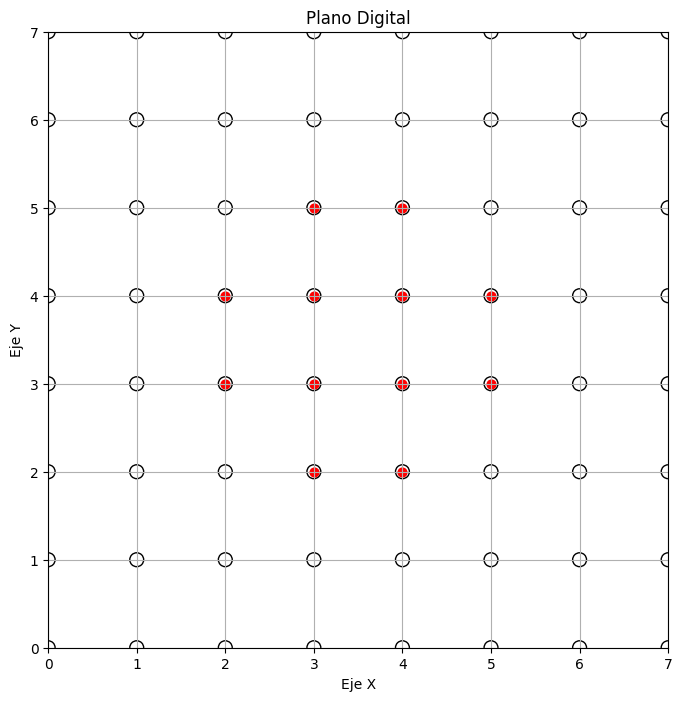

Interior Int(S)= {(4, 4), (3, 4), (4, 3), (5, 4), (2, 3), (4, 5), (3, 3), (3, 2)}


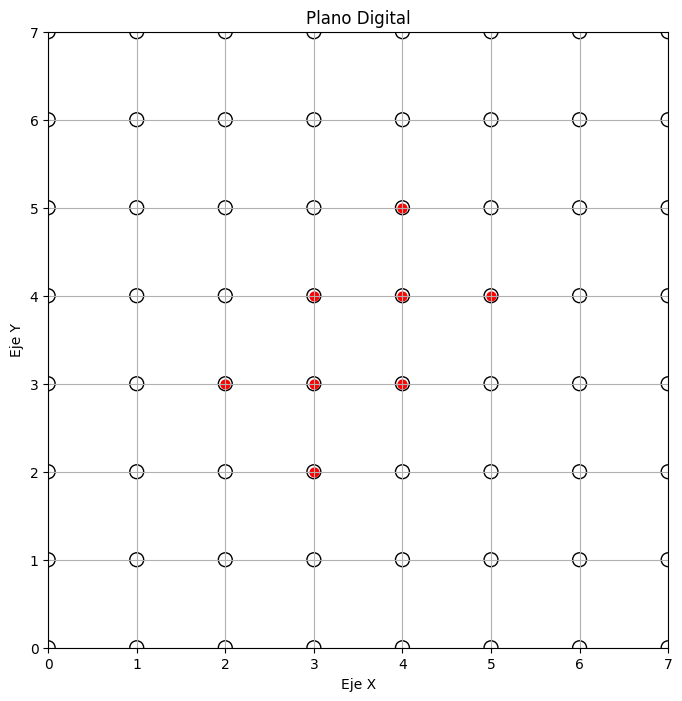

Frontera Fr(S)= {(2, 4), (5, 4), (4, 2), (2, 3), (4, 5), (5, 3), (3, 2), (3, 5)}


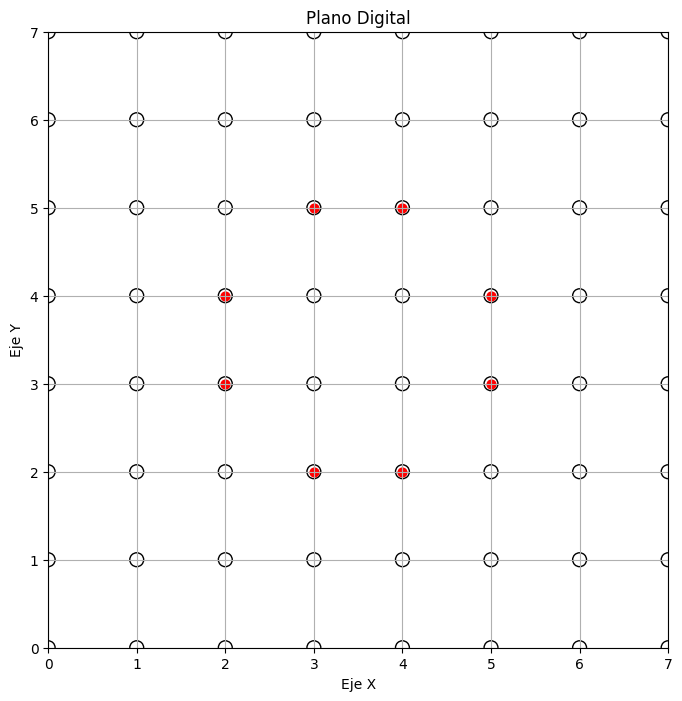

In [376]:

if __name__=="__main__":
    #Ejemplo 2.3: Es S es abierto en la topología digital, obtener su interior y su frontera?
    S = {(2,4),(2,3),(3,5),(3,4),(3,3),(3,2),(4,5),(4,4),(4,3),(4,2),(5,4),(5,3)}
    print("El conjunto S=", S)
    graficarPlanoDigital(S)
    print("Interior Int(S)=", interior(S))
    graficarPlanoDigital(interior(S))
    print("Frontera Fr(S)=", frontera(S))
    graficarPlanoDigital(frontera(S))
    es_abierto(S)
    #es_abierto(frontera(S))

## <center>*====Capítulo 3: Propiedades topológicas de una imagen digital====*</center>

### *Definición 3.1: Imagen digital  $\Pi$  y su frontera*

Una imagen digital $ \Pi $ de  en $ M \times N $ Píxeles se define como un subconjunto finito de $ \mathbb{Z}^2 $ que satisface las siguientes restricciones:
$$ \Pi = \{(x, y) : 1 \leq x \leq N, 1 \leq y \leq M\} $$

En este contexto, el borde de $ \Pi $, denotado como $ \text{Borde}(\Pi) $, se define como el conjunto de puntos que pertenecen a $ \Pi $ y que están ubicados en los límites de la imagen. Formalmente, el borde se describe como:
$$ \text{Borde}(\Pi) = \{(x, y) \in \Pi : x = 1 \lor x = N \lor y = 1 \lor y = M\} $$

El borde de $ \Pi $ consiste en aquellos píxeles que están en los bordes izquierdo, derecho, superior o inferior de la imagen $ \Pi $ en el plano discreto $ \mathbb{Z}^2 $.


### *Definición 3.2: La Topología $ \tau_{\Pi} $ de $ \Pi $*

La topología $ \tau_{\Pi} $ de $ \Pi $ es la topología generada por la base $ \mathcal{B}_{\Pi} $ definida como:
$$ \mathcal{B}_{\Pi} = \{ U(P) \cap \Pi : P \in \mathbb{Z}^2 \} $$

En consecuencia, los miembros de $ \tau_{\Pi} $ se pueden expresar como uniones de elementos de $ \mathcal{B}_{\Pi} $.


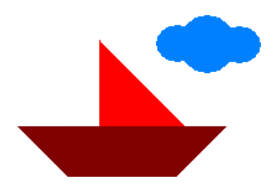

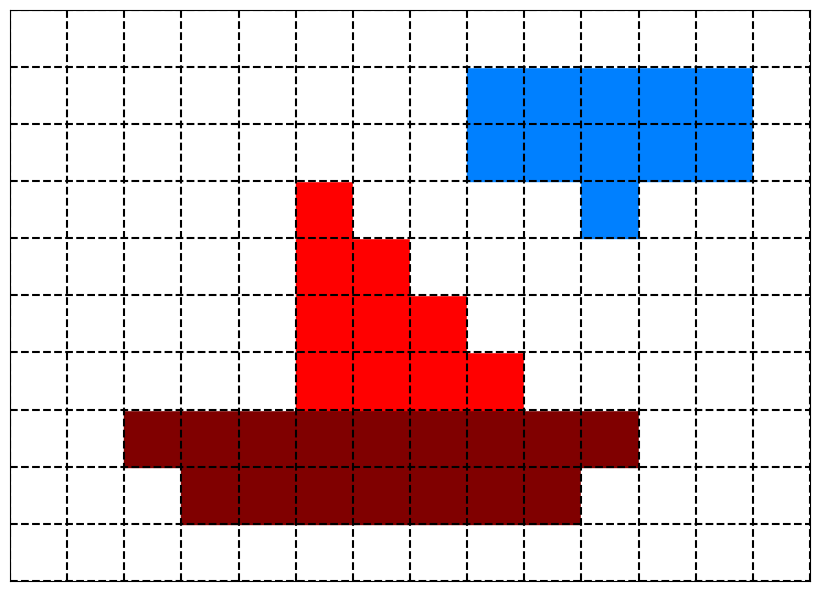

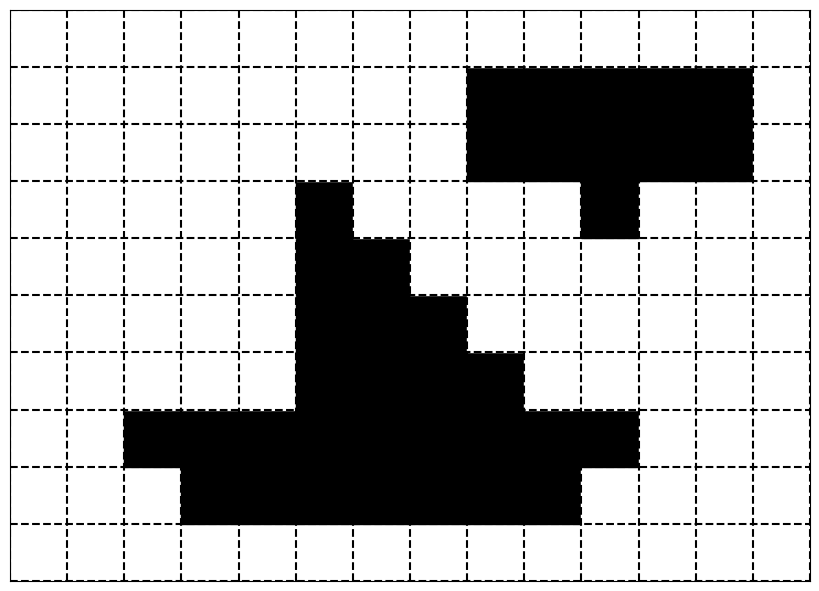

In [377]:
def conjImgDigital(matriz):
    M, N = matriz_img.shape
    return {(x, y) for x in range(1, M+1) for y in range(1, N+1)}


def borde(matriz_img):
    M, N = matriz_img.shape
    bordeAltos = {(x, y) for x in [1, M] for y in range(1, N+1)}
    bordeAncho = {(x, y) for x in range(1, M+1) for y in [1, N]}
    return bordeAltos | bordeAncho
    

def topoHereda(matrizImg):
    pi_ = conjImgDigital(matrizImg)
    base = {U(p) & pi_ for p in pi_}
    return base

if __name__=="__main__":
    #Ejemplo 3.1: 
    #abriendo image
    dir_img = 'ship.png'
    imagen = Image.open('ship.png')
    ancho = 14
    alto = 10
    resolucion = (ancho, alto)

    #matriz de la imagen
    matriz_img_RGB = matrizImagenDigital(imagen, resolucion)
    matriz_img_BN = matrizImagenDigital(imagen, resolucion, "B/N")
    #print(matriz_img)

    display(imagen)
    mostrar_matriz_img(matriz_img_RGB)
    mostrar_matriz_img(matriz_img_BN)


    

**Definición 3.3: Caminos o trayectorias**

Sean $P$ y $Q$ dos puntos de la imagen $\Pi$. Un "camino o trayectoria de $P$ a $Q$" es una sucesión finita de puntos $P_0, P_1, \ldots, P_n = Q$ pertenecientes a $\Pi$ tal que $P_i$ es "vecino" de $P_{i+1}$ para $1 \leq i \leq n$.


In [390]:
def encontrar_caminos(image, P, Q, tipo="8N"):
    def vecinos(punto):
        x, y = punto
        if tipo == "4N":
            vecindad = [(x, y + 1), (x, y - 1), (x + 1, y), (x - 1, y)]
        elif tipo == "8N":
            vecindad = [(x, y + 1), (x, y - 1), (x + 1, y), (x - 1, y),
                        (x + 1, y + 1), (x + 1, y - 1), (x - 1, y + 1), (x - 1, y - 1)]
        return [vecino for vecino in vecindad if vecino in image]

    def dfs(punto, camino, visitados):
        if punto == Q:
            caminos.append(camino)
            return
        for vecino in vecinos(punto):
            if vecino not in visitados:
                visitados.add(vecino)
                camino.append(vecino)
                dfs(vecino, camino, visitados)
                visitados.remove(vecino)
                camino.pop()

    caminos = []
    visitados = set()
    visitados.add(P)
    dfs(P, [P], visitados)

    return caminos




if __name__=="__main__":
    
    # Ejemplo 3.3
    #imagen = {(x,y) for x in range(1, 7) for y in range(1,7)}
    #P = (2, 3)
    #Q = (5, 5)
    #caminos4N = encontrar_caminos(imagen, P, Q, tipo = "4N")
    #print(caminos4N)
    #caminos8N = encontrar_caminos(imagen, P, Q, tipo = "8N")
    #graficarPlanoDigital(caminos8N[1])
    imagen = [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
    P = (0, 0)
    Q = (2, 2)

    caminos_4N = encontrar_caminos(imagen, P, Q, tipo="4N")
    for i, camino in enumerate(caminos_4N):
        print(f"Camino 4N {i + 1}: {camino}")

    caminos_8N = encontrar_caminos(imagen, P, Q, tipo="8N")
    for i, camino in enumerate(caminos_8N):
        print(f"Camino 8N {i + 1}: {camino}")
    


Camino 4N 1: [(0, 0)]
Camino 4N 2: [(0, 0)]
Camino 4N 3: [(0, 0)]
Camino 4N 4: [(0, 0)]
Camino 8N 1: [(0, 0)]
Camino 8N 2: [(0, 0)]
Camino 8N 3: [(0, 0)]
Camino 8N 4: [(0, 0)]
Camino 8N 5: [(0, 0)]
Camino 8N 6: [(0, 0)]
Camino 8N 7: [(0, 0)]
Camino 8N 8: [(0, 0)]
Camino 8N 9: [(0, 0)]
Camino 8N 10: [(0, 0)]
Camino 8N 11: [(0, 0)]
Camino 8N 12: [(0, 0)]
Camino 8N 13: [(0, 0)]
Camino 8N 14: [(0, 0)]
Camino 8N 15: [(0, 0)]
Camino 8N 16: [(0, 0)]
Camino 8N 17: [(0, 0)]
Camino 8N 18: [(0, 0)]
Camino 8N 19: [(0, 0)]
Camino 8N 20: [(0, 0)]
Camino 8N 21: [(0, 0)]
Camino 8N 22: [(0, 0)]
Camino 8N 23: [(0, 0)]
Camino 8N 24: [(0, 0)]
Camino 8N 25: [(0, 0)]
Camino 8N 26: [(0, 0)]
Camino 8N 27: [(0, 0)]
Camino 8N 28: [(0, 0)]
Camino 8N 29: [(0, 0)]
Camino 8N 30: [(0, 0)]
Camino 8N 31: [(0, 0)]
Camino 8N 32: [(0, 0)]
Camino 8N 33: [(0, 0)]
Camino 8N 34: [(0, 0)]
Camino 8N 35: [(0, 0)]
Camino 8N 36: [(0, 0)]
Camino 8N 37: [(0, 0)]
Camino 8N 38: [(0, 0)]
Camino 8N 39: [(0, 0)]
Camino 8N 40: [(0, 0)]
C